<a href="https://colab.research.google.com/github/covillarreal/AprendizajeAutomatico/blob/main/VILLARREAL_TP2_AA1_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

**CONSTANZA VILLARREAL**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  🪄
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  

DATASET UTILIZADO: [WINE](https://archive.ics.uci.edu/dataset/109/wine)


## Resolución:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nombres de las columnas (según documentación de UCI)
columnas = [
    'Clase','Alcohol','Ácido Málico','Ceniza','Alcalinidad de la Ceniza',
    'Magnesio','Fenoles Totales','Flavonoides','Fenoles No Flavonoides',
    'Proantocianinas','Intensidad de Color','Matiz',
    'OD280/OD315 del Vino','Prolina'
]
# Cargar el dataset
df = pd.read_csv('wine.data.csv', header=None, names=columnas)

# Vista previa
print(df.head())

   Clase  Alcohol  Ácido Málico  Ceniza  Alcalinidad de la Ceniza  Magnesio  \
0      1    14.23          1.71    2.43                      15.6       127   
1      1    13.20          1.78    2.14                      11.2       100   
2      1    13.16          2.36    2.67                      18.6       101   
3      1    14.37          1.95    2.50                      16.8       113   
4      1    13.24          2.59    2.87                      21.0       118   

   Fenoles Totales  Flavonoides  Fenoles No Flavonoides  Proantocianinas  \
0             2.80         3.06                    0.28             2.29   
1             2.65         2.76                    0.26             1.28   
2             2.80         3.24                    0.30             2.81   
3             3.85         3.49                    0.24             2.18   
4             2.80         2.69                    0.39             1.82   

   Intensidad de Color  Matiz  OD280/OD315 del Vino  Prolina  
0    



Primero importo las librerías necesarias: pandas (como pd), que utilizo para manipular y analizar datos; matplotlib.pyplot (como plt), que me sirve para crear gráficos; y seaborn (como sns), que es una librería que mejora la visualización de los datos, haciéndola más estética y sencilla de usar.

Luego, defino una lista de nombres de columnas, que corresponden a las características de un conjunto de datos relacionado con vinos que he sacado la informacion de la página proporcionada. Estos nombres los asigno a la variable columnas.

Después, cargo el conjunto de datos llamado 'wine.data.csv' que seleccione para trabajar utilizando pandas con el método read_csv(). Este método lee el archivo CSV y lo convierte en un DataFrame (una estructura de datos tabular) al que le asigno los nombres de las columnas definidos previamente. Finalmente, imprimo las primeras filas del DataFrame con df.head() para ver cómo luce el conjunto de datos cargado.



## 2. **Análisis exploratorio (previo al modelado)**   🔎📊
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

Con esta línea de código, lo que hago es generar una descripción estadística del DataFrame df usando el método describe(). Este método me proporciona información clave sobre cada una de las columnas numéricas del conjunto de datos, como:

* Cuenta (count): El número de valores no nulos que tiene cada columna.

* Media (mean): El valor promedio de cada columna.

* Desviación estándar (std): Cuánto varían los valores de cada columna respecto a la media.

* Mínimo (min): El valor más bajo de cada columna.

* Cuartiles (25%, 50%, 75%): Los valores que dividen los datos en cuartiles. El 50% es la mediana, y los otros dos valores son el primer y tercer cuartil.

* Máximo (max): El valor más alto de cada columna.

Esto me ayuda a obtener una visión general rápida de cómo están distribuidos los datos y si existen valores atípicos o alguna columna que tenga datos extraños o faltantes.

In [35]:
df.describe() #descripcion estadistica

,Clase,Alcohol,Ácido Málico,Ceniza,Alcalinidad de la Ceniza,Magnesio,Fenoles Totales,Flavonoides,Fenoles No Flavonoides,Proantocianinas,Intensidad de Color,Matiz,OD280/OD315 del Vino,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Variable Clase**
* Representa el tipo de vino (probablemente hay 3 tipos).

* Valores posibles: 1, 2 o 3.

* Distribución: la media es aproximadamente 1.94, lo que indica que los vinos están bastante repartidos entre las clases, pero con un predominio de clase 2.

**Análisis de variables numéricas**
1. Alcohol

* Distribución relativamente simétrica.

* Sin valores extremos evidentes.

2. Ácido Málico
* Media: 2.33, pero el valor máximo llega a 5.8.

* Mediana mucho menor que el máximo ⇒ hay valores atípicos altos.

* Posiblemente algunos vinos tienen altas concentraciones por características particulares del viñedo.

3. Ceniza & Alcalinidad de la Ceniza
* “Ceniza” va de 1.36 a 3.23.

* Pero “Alcalinidad de la Ceniza” llega hasta 30, mientras que el 75% está por debajo de 21.5 ⇒ hay valores atípicos altos.

4. Magnesio
* Va de 70 a 162, pero la mayoría de los vinos (75%) tienen menos de 107.

* El máximo de 162 podría ser un outlier (muy alto comparado con el resto).

5. Fenoles Totales y Flavonoides

* Algunos valores extremos, pero nada extremadamente alejado ⇒ ligera asimetría, posiblemente vinos con concentración elevada.

6. Proantocianinas & Fenoles no flavonoides
* Valores bajos en general.

7. Intensidad de Color
* Media: 5.05, pero el máximo es 13

* 75% de los valores están por debajo de 6.2 ⇒ hay algunos vinos mucho más intensos en color, probablemente outliers visuales.

8. Matiz (Hue)
* Va de 0.48 a 1.71

* Distribución bastante pareja.

9. OD280/OD315
* Media: 2.61, pero con valores desde 1.27 hasta 4.00

* Mayor proporción bajo 3.17 (percentil 75%) ⇒ algunos vinos muy ricos en compuestos fenólicos.

10. Prolina
* Aquí hay una fuerte señal de valores atípicos:

  * Media: 746

  * Máximo: 1680

  * 75% de los valores están por debajo de 985

* Algunos vinos tienen más del doble de Prolina que otros ⇒ probablemente muy distintos en perfil químico.

📌 Conclusiones clave

Hay varias variables con valores atípicos o asimetrías, como:

* Ácido Málico, Alcalinidad de la Ceniza, Magnesio, Color, y sobre todo Prolina.

Esto sugiere que:

* Hay vinos químicamente muy distintos entre sí.

* Algunas clases pueden tener características químicas mucho más marcadas que otras.

Estos outliers no necesariamente son errores, pero es importante escalarlos y analizarlos con cuidado antes de aplicar modelos.

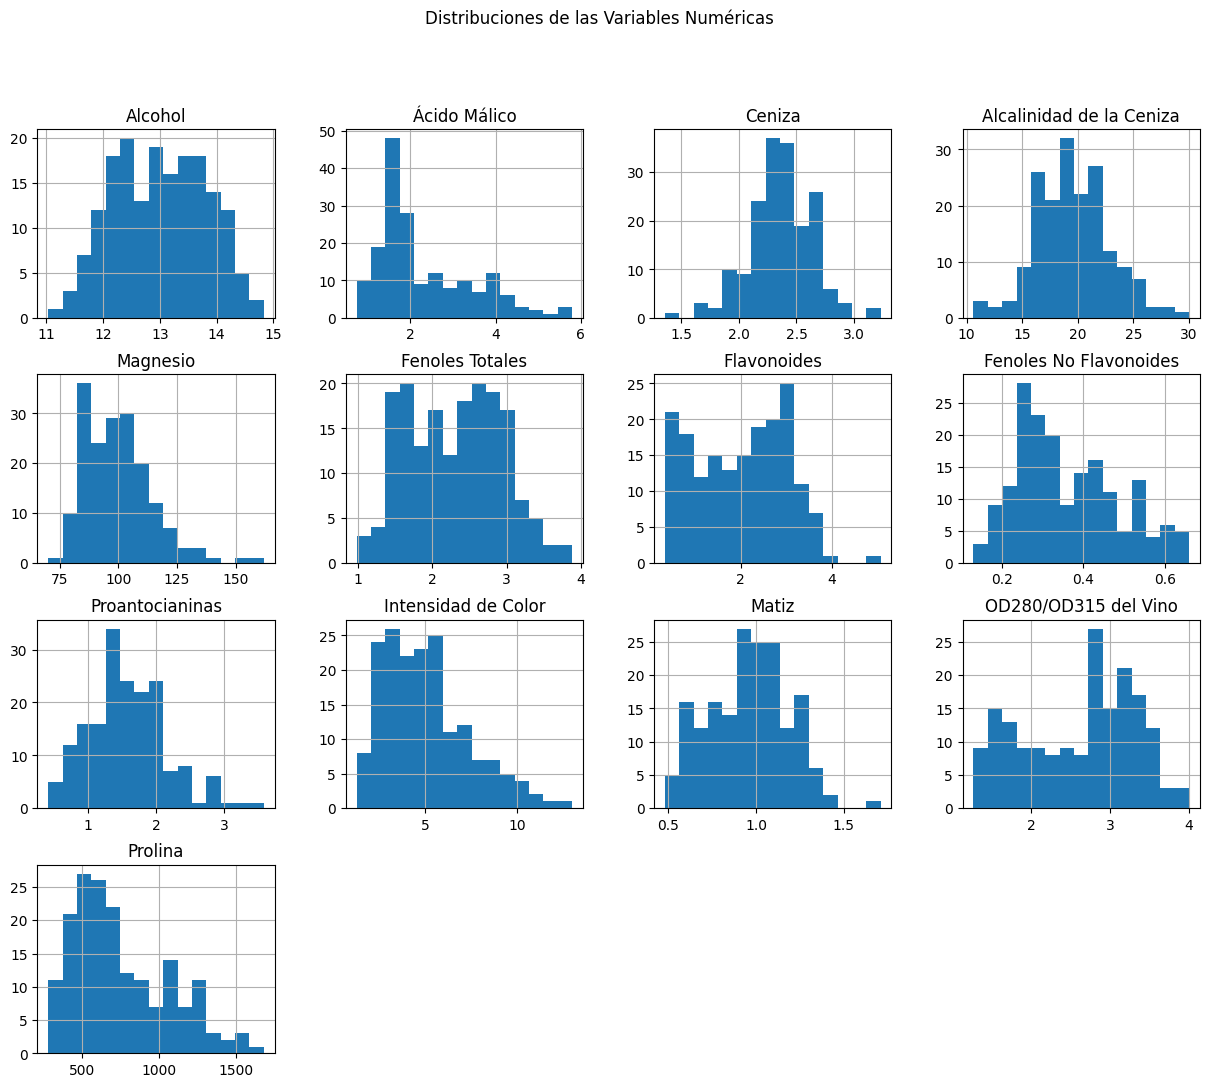

In [36]:
df.drop('Clase', axis=1).hist(figsize=(15, 12), bins=15)
plt.suptitle("Distribuciones de las Variables Numéricas")
plt.show()

Con este bloque de código, lo que hago es lo siguiente:

Primero, elimino la columna 'Clase' del DataFrame df utilizando el método drop(). Como no me interesa esta columna para el análisis de distribuciones numéricas, la dejo fuera. La opción axis=1 indica que quiero eliminar una columna, no una fila.

Luego, genero un histograma para cada una de las variables numéricas restantes del DataFrame. Para ello, uso el método hist(), que crea un histograma para cada columna numérica. La opción figsize=(15, 12) especifica el tamaño de la figura para que los gráficos sean lo suficientemente grandes y fáciles de leer. La opción bins=15 indica que cada histograma tendrá 15 intervalos (o "bins").

Finalmente, añado un título general a la figura utilizando plt.suptitle() y luego muestro los gráficos con plt.show(). Esto me permite ver cómo se distribuyen los datos de cada una de las variables numéricas en el conjunto de datos.

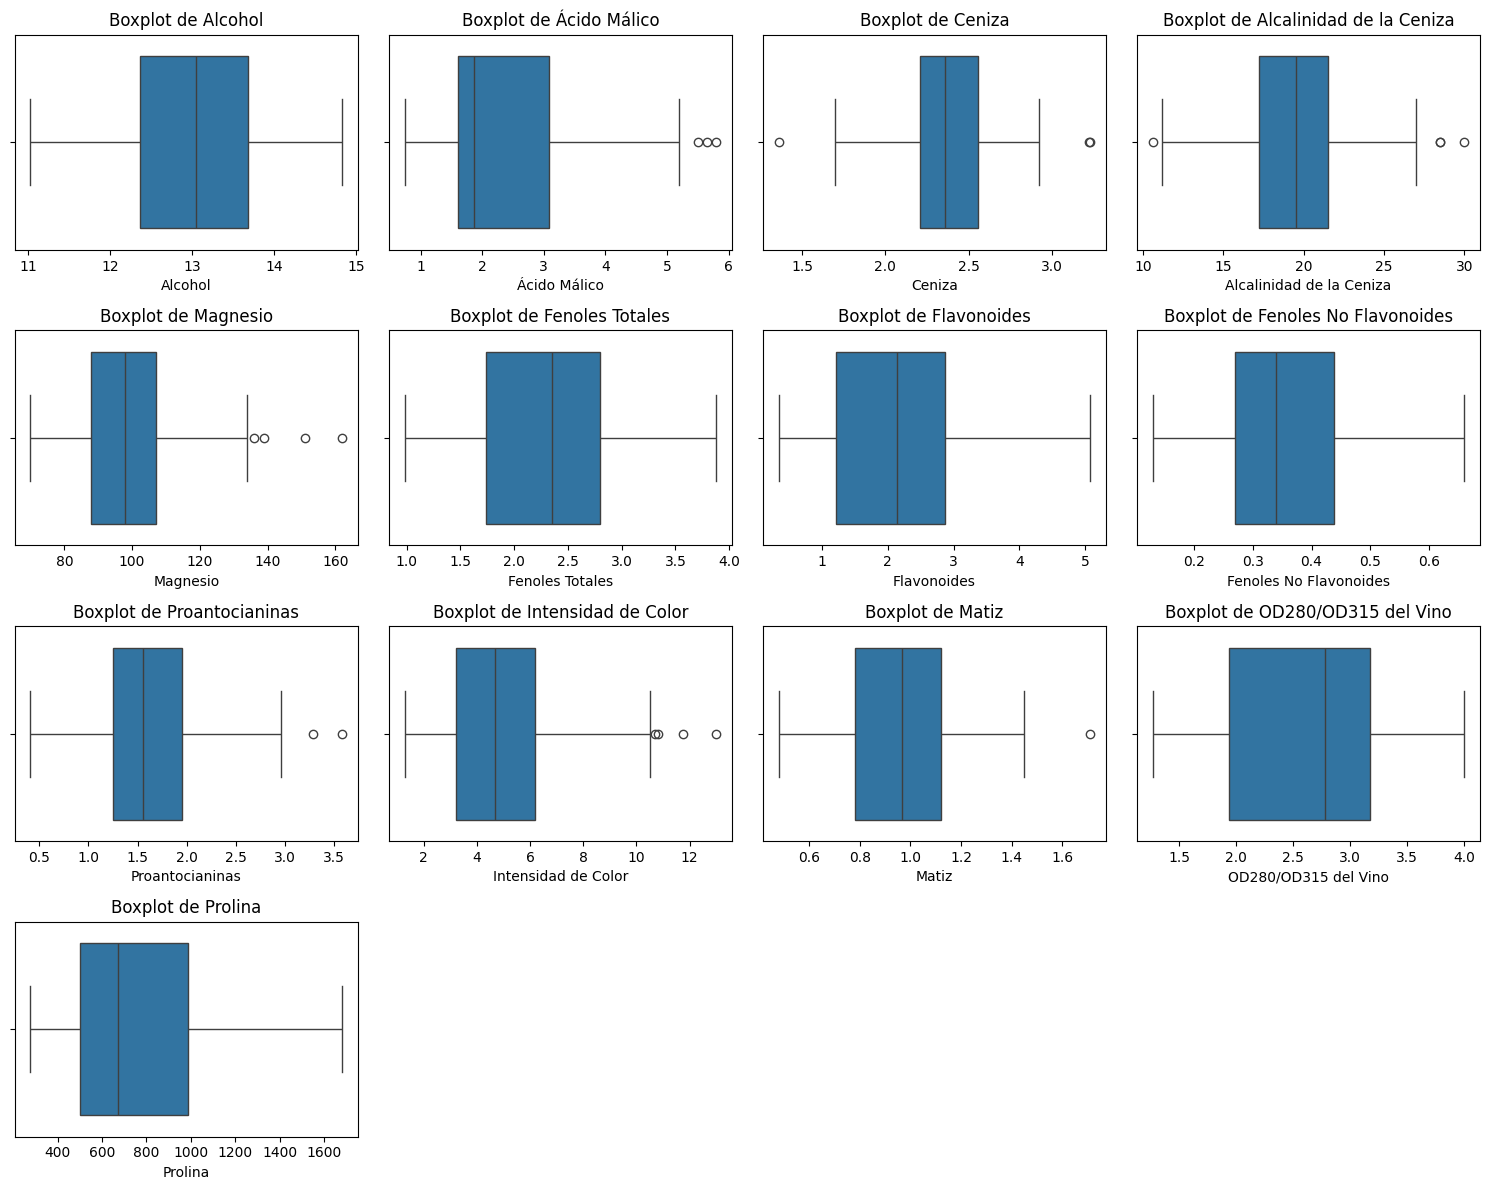

In [37]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns[1:]):  # Excluye 'Clase'
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

En este bloque de código, lo que hago es crear una serie de gráficos de caja (boxplots) para cada una de las variables numéricas, excluyendo la columna 'Clase'.

Primero, configuro el tamaño de la figura con plt.figure(figsize=(15, 12)), para asegurarme de que los gráficos tengan suficiente espacio y sean faciles de leer.

Luego, utilizo un bucle for para recorrer cada una de las columnas del DataFrame, excluyendo la columna 'Clase' (que está en la primera posición). Con df.columns[1:] selecciono todas las columnas a partir de la segunda (de ahí el uso de 1:). En cada iteración, creo un subplot (gráfico en miniatura dentro de la figura general) con plt.subplot(4, 4, i + 1). Esto organiza los boxplots en una cuadrícula de 4 filas y 4 columnas.

Dentro del bucle, para cada columna, creo un gráfico de caja utilizando sns.boxplot(x=df[col]), que me ayuda a visualizar la distribución de los datos y los posibles valores atípicos (outliers). Cada gráfico recibe un título específico con plt.title(f"Boxplot de {col}").

Finalmente, ajusto la disposición de los subgráficos con plt.tight_layout() para que no se solapen y luego muestro la figura con plt.show().

El resultado es una visualización de los boxplots de todas las variables numéricas, lo que me permite ver de forma clara las distribuciones, la mediana, los cuartiles y los valores atípicos de cada variable.

En la visualización de los gráficos se pueden observar valores atípicos pero que cumple con los parametros informados y estudiados, por lo que no será necesario quitar esos outliers ya que pueden presentar una información valiosa como el hallazgo de nuevos insight.

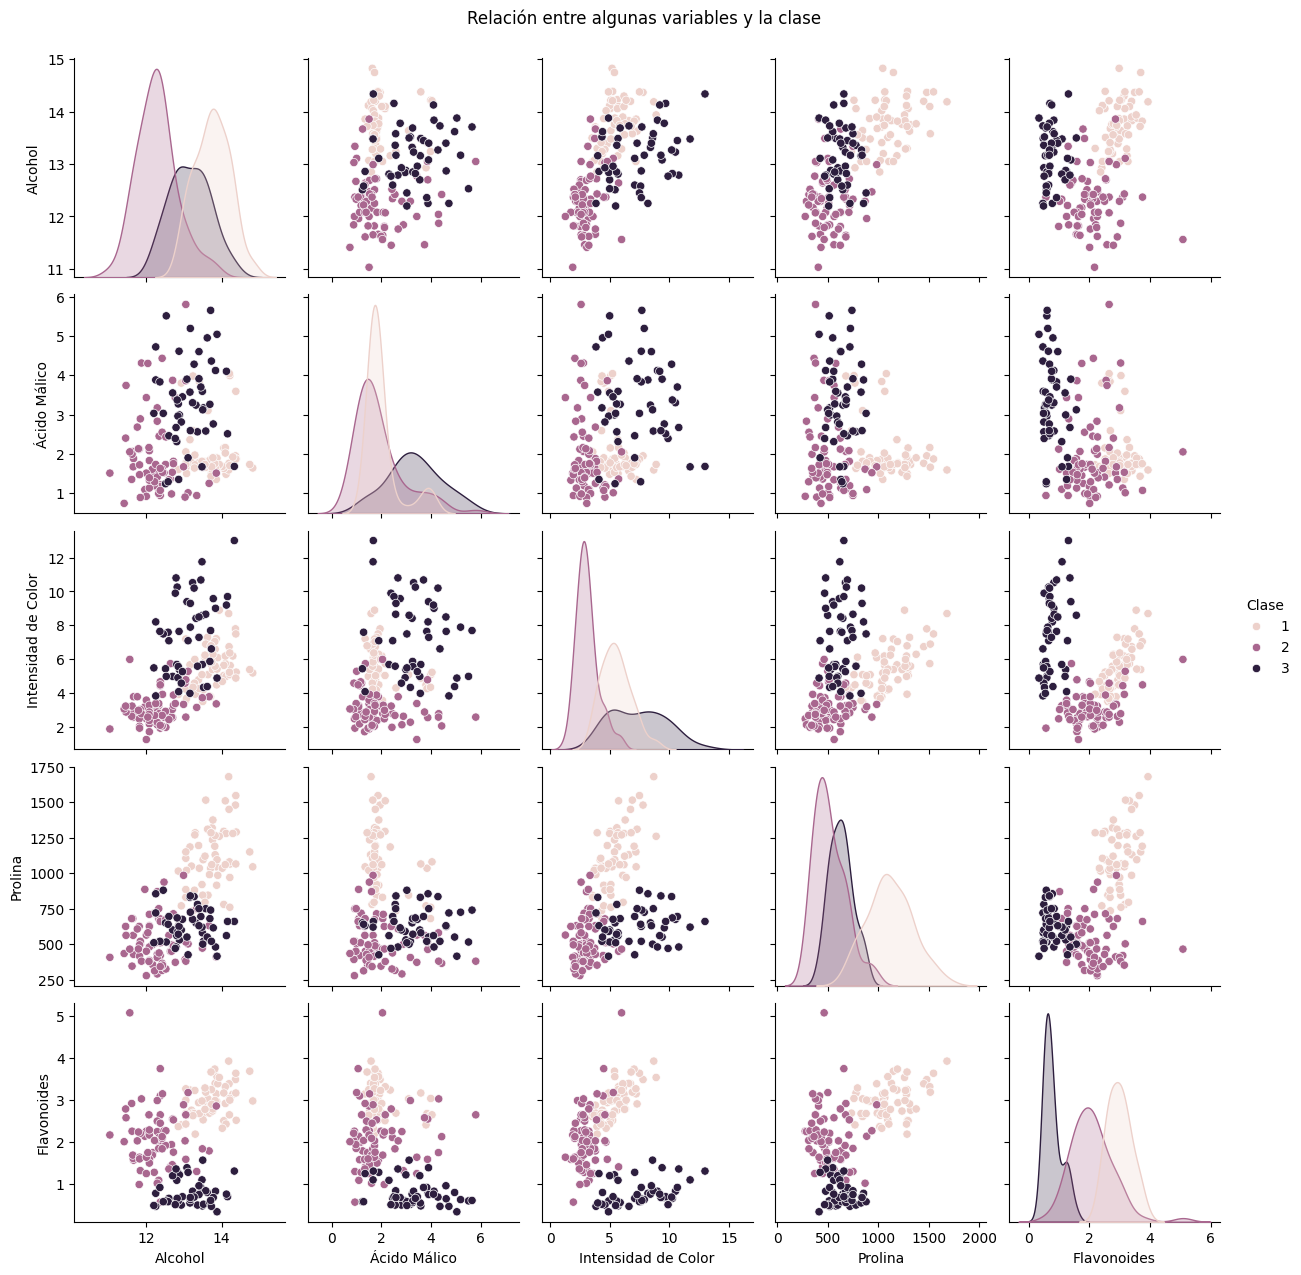

In [38]:
# Gráfico de pares con nombres de columnas
sns.pairplot(df[['Alcohol', 'Ácido Málico', 'Intensidad de Color', 'Prolina', 'Flavonoides', 'Clase']], hue='Clase')
plt.suptitle("Relación entre algunas variables y la clase", y=1.02)
plt.show()

🔍 Observaciones:

**Alcohol:**

* Se ve una separación bastante clara entre las clases.

* La Clase 2 tiene valores de alcohol más altos en general.

**Ácido málico:**

* Esta variable no separa tan claramente las clases.

* Se observan bastante superposición entre clases, aunque la clase 3 tiende a valores más bajos.

**Intensidad de Color:**

* Hay una diferencia visual en la distribución:

* La Clase 2 tiende a tener mayor intensidad de color.

* Las clases 1 y 2 se solapan más.

**Prolina:**

* Excelente variable para diferenciar clases.

* La Clase 2 tiene valores de Proline mucho más altos que las demás.

* Separación muy visible.


En este bloque de código, lo que hago es generar una matriz de gráficos de dispersión (scatter plots) entre algunas variables del DataFrame, con la ayuda de seaborn y su función pairplot().

Primero, selecciono un subconjunto de las columnas del DataFrame df que quiero analizar: 'Alcohol', 'Malic_Acid', 'Color_Intensity', 'Proline', 'Flavanoids', 'Clase'. Estas son las variables que se van a comparar entre sí en los gráficos.

Luego, utilizo la función sns.pairplot() para crear los gráficos de dispersión entre todas las combinaciones posibles de estas columnas seleccionadas. Además, paso el argumento hue='Clase' para que cada punto de los gráficos se coloree de acuerdo con la columna 'Clase', que es la variable objetivo (en este caso, la clase de vino). Esto me permite ver cómo se agrupan las diferentes clases de vino según estas características.

Finalmente, añado un título general con plt.suptitle("Relación entre algunas variables y la clase") y muestro la matriz de gráficos con plt.show().

El resultado es una visualización que me ayuda a entender cómo se relacionan las variables seleccionadas entre sí y cómo estas relaciones difieren entre las distintas clases de vino.

## 3. **Preprocesamiento**  ⚙️💡
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## Resolución:

In [39]:
# Revisamos si hay valores nulos en el dataset
df.isnull().sum()

,0
Clase,0
Alcohol,0
Ácido Málico,0
Ceniza,0
Alcalinidad de la Ceniza,0
Magnesio,0
Fenoles Totales,0
Flavonoides,0
Fenoles No Flavonoides,0
Proantocianinas,0


Con esta línea de código, lo que hago es revisar si hay valores nulos (es decir, datos faltantes) en el DataFrame df. Utilizo el método isnull() para identificar las celdas que contienen valores nulos, lo que me devuelve un DataFrame de valores booleanos (True para los valores nulos y False para los valores no nulos).

Luego, con .sum(), sumo los valores True (que representan los valores nulos) por cada columna. Esto me muestra cuántos valores nulos hay en cada columna del conjunto de datos.

De esta manera, puedo identificar rápidamente si existe algún problema con los datos faltantes y saber en qué columnas podría necesitar realizar algún tratamiento o limpieza de datos.

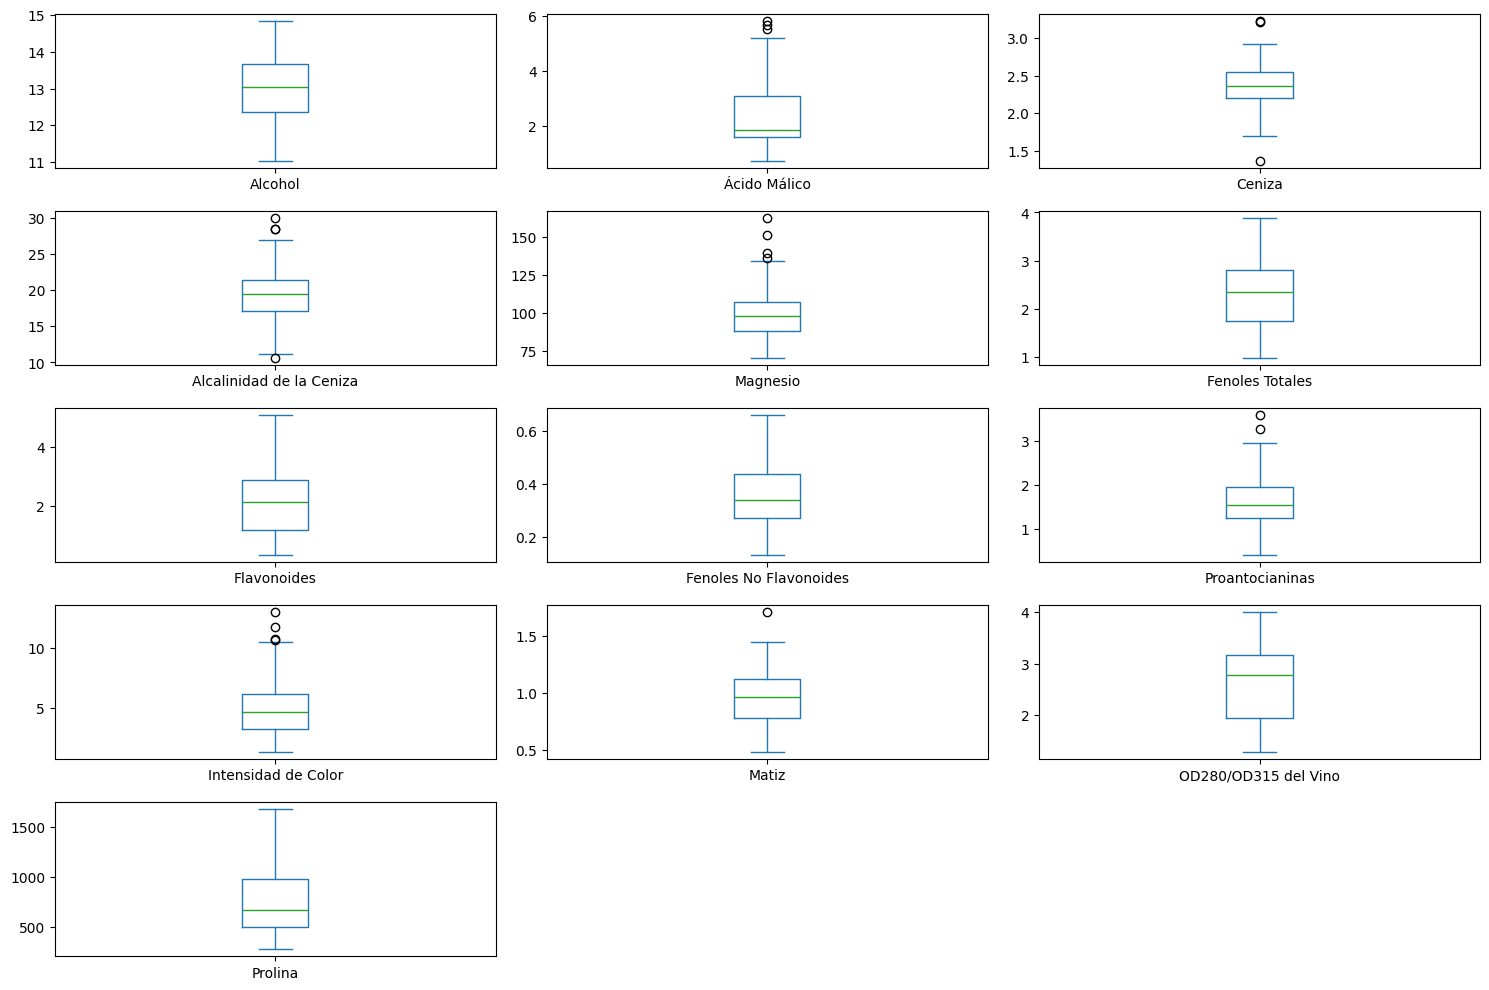

In [40]:
# Creamos boxplots para las variables numéricas
df.drop('Clase', axis=1).plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

No voy a eliminar los outliers en este caso.

**Justificación:**

* No parecen errores de carga: Los valores extremos están dentro de un rango lógico (por ejemplo, Proline o Color_Intensity), no son valores muy alejados.

* Pueden ser parte del comportamiento natural de los distintos tipos vinos: Es probable que reflejen diferencias reales entre clases de vino, lo cual puede ser útil para clustering.

* Eliminar outliers podría hacer perder información importante, especialmente si están relacionados con una clase particular.

En este bloque de código, lo que hago es crear gráficos de caja (boxplots) para las variables numéricas del DataFrame df, excluyendo la columna 'Clase', para visualizar la distribución de los datos y los posibles valores atípicos.

Primero, elimino la columna 'Clase' con df.drop('Clase', axis=1) para enfocarme únicamente en las variables numéricas. Luego, con .plot(kind='box'), le indico a pandas que quiero generar boxplots para cada una de las columnas numéricas.

El argumento subplots=True crea un gráfico de caja individual para cada columna. La opción layout=(5, 3) organiza los boxplots en una cuadrícula de 5 filas y 3 columnas, y figsize=(15, 10) ajusta el tamaño de la figura para que los gráficos sean faciles de leer.

La opción sharex=False indica que cada gráfico tendrá su propio eje x, ya que las escalas de las variables pueden ser diferentes.

Finalmente, uso plt.tight_layout() para ajustar automáticamente la disposición de los subgráficos y evitar que se solapen. Luego, con plt.show(), muestro todos los boxplots generados.

El resultado es una visualización en la que puedo ver de forma clara la distribución de cada variable, incluyendo la mediana, los cuartiles y los valores atípicos de cada una.

**Variables categóricas**

* El dataset no tiene variables categóricas (solo Clase, que es numérica pero representa una categoría).

* No es necesario codificar nada con One-Hot ni LabelEncoder.

* Clase se puede mantener aparte si no se usa en el clustering directamente (porque el clustering es no supervisado).

In [41]:
from sklearn.preprocessing import StandardScaler

# Guardo las features y la clase por separado
X = df.drop(columns=['Clase'])
y = df['Clase']  # para usar después en visualizaciones

# Aplico escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

En este bloque de código, realizo el escalado de las características (features) del conjunto de datos, lo cual es un paso importante cuando trabajamos con modelos de machine learning que son sensibles a las escalas de las variables, como muchos de los algoritmos de clasificación y regresión.

Primero, separo las características (X) y la clase (y). Con df.drop(columns=['Clase']), elimino la columna 'Clase' del DataFrame, ya que quiero usar solo las variables numéricas como entrada para los modelos. Luego, guardo la columna 'Clase' en la variable y, ya que esta será mi variable objetivo (la que quiero predecir, por ejemplo).

A continuación, aplico el escalado a las características con StandardScaler de sklearn. Este es un tipo de normalización que transforma los datos de manera que tengan media cero y desviación estándar uno. Esto es útil para asegurar que todas las características tengan la misma escala, evitando que algunas variables dominen a otras debido a su magnitud.

Utilizo scaler.fit_transform(X) para ajustar el escalador a los datos de X (es decir, calcula la media y desviación estándar) y luego transformar esos datos, escalándolos. El resultado es un nuevo conjunto de datos, X_scaled, que contiene las mismas características pero ahora en una escala estándar.

Este paso es esencial antes de entrenar modelos de machine learning que requieren que las variables estén en la misma escala para asegurar un buen rendimiento del modelo.




## 4. **Clustering**  🎯🧩
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

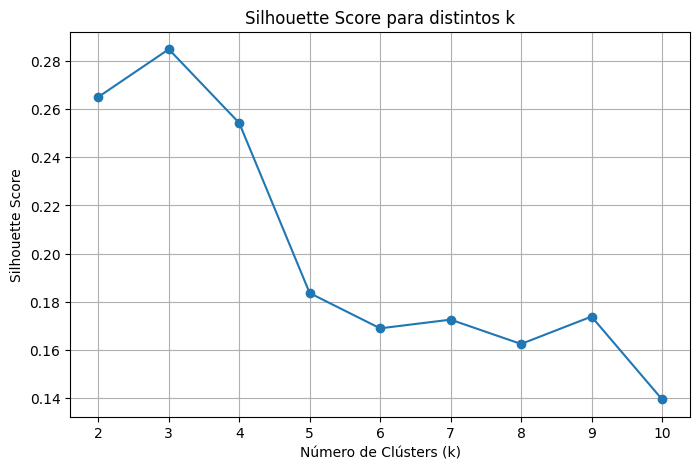

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Evaluamos distintos números de clústers (de 2 a 10)
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Graficamos los Silhouette Scores para cada k
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clústers (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para distintos k')
plt.grid(True)
plt.show()

**Justificación de la elección de k = 3**

* Silhouette Score = 0.29 aproximadamente : No es perfecto (lo ideal es >0.5), pero es el mejor dentro del rango probado.

* Coincide con la variable real Clase del dataset, que también tiene 3 clases de vino → lo cual valida indirectamente esta elección.

En este bloque de código, lo que estoy haciendo es evaluar la calidad de los clústers generados por el algoritmo de KMeans para diferentes valores de k, que representa el número de clústers. Para hacer esto, utilizo el Silhouette Score, que es una métrica que mide qué tan bien se agrupan los datos.

Primero, importo las herramientas necesarias:

* KMeans de sklearn.cluster para realizar el agrupamiento (clustering).

* silhouette_score de sklearn.metrics para calcular la calidad del agrupamiento.

Luego, defino un rango de valores de k que voy a evaluar, desde 2 hasta 10 (k_range = range(2, 11)), y creo una lista vacía llamada silhouette_scores donde voy a almacenar los resultados del Silhouette Score para cada valor de k.

A continuación, inicio un bucle for que recorre cada valor de k dentro del rango definido:

* En cada iteración, creo un objeto KMeans con n_clusters=k y un valor fijo de random_state=42 (para que los resultados sean reproducibles).

* Uso kmeans.fit_predict(X_scaled) para ajustar el modelo KMeans a los datos escalados (X_scaled) y obtener las etiquetas (o asignaciones de clúster) para cada punto de datos.

* Calculo el Silhouette Score para el modelo generado utilizando silhouette_score(X_scaled, labels), lo que me da una medida de cuán bien se separan los puntos dentro de sus propios clústers y entre los diferentes clústers. Un valor cercano a 1 indica una buena separación, mientras que un valor cercano a -1 indica que los clústers están mal formados.

* Almaceno este valor en la lista silhouette_scores.

Finalmente, genero una gráfica para visualizar cómo varía el Silhouette Score según el número de clústers k. Utilizo plt.plot(k_range, silhouette_scores, marker='o') para crear un gráfico de líneas con puntos marcados en cada valor de k. Ajusto los ejes y el título de la gráfica y, finalmente, la muestro con plt.show().

Esta gráfica me ayuda a elegir el número óptimo de clústers para el algoritmo de KMeans, ya que el valor de k que maximice el Silhouette Score suele ser el más adecuado para una buena separación de los clústers.

In [43]:
# Asignar los clústers al DataFrame original
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # X_scaled: datos ya estandarizados
df_clustered = df.copy()
df_clustered["Cluster"] = clusters
print (df_clustered)

     Clase  Alcohol  Ácido Málico  Ceniza  Alcalinidad de la Ceniza  Magnesio  \
0        1    14.23          1.71    2.43                      15.6       127   
1        1    13.20          1.78    2.14                      11.2       100   
2        1    13.16          2.36    2.67                      18.6       101   
3        1    14.37          1.95    2.50                      16.8       113   
4        1    13.24          2.59    2.87                      21.0       118   
..     ...      ...           ...     ...                       ...       ...   
173      3    13.71          5.65    2.45                      20.5        95   
174      3    13.40          3.91    2.48                      23.0       102   
175      3    13.27          4.28    2.26                      20.0       120   
176      3    13.17          2.59    2.37                      20.0       120   
177      3    14.13          4.10    2.74                      24.5        96   

     Fenoles Totales  Flavo

En este bloque de código, lo que hago es asignar los clústers generados por el algoritmo de KMeans al DataFrame original, de modo que pueda ver a qué clúster pertenece cada observación del conjunto de datos.

Primero, creo un objeto KMeans con n_clusters=3 para indicar que quiero agrupar los datos en tres clústers (este número de clústers lo elegí basándome en el análisis previo del Silhouette Score). También fijo el valor de random_state=42 para garantizar que los resultados sean reproducibles.

Luego, aplico el algoritmo a los datos ya estandarizados (X_scaled) usando kmeans.fit_predict(X_scaled). Este método ajusta el modelo a los datos y, al mismo tiempo, predice las etiquetas de clúster para cada punto de datos. Las etiquetas de clúster (valores enteros que indican a qué clúster pertenece cada observación) las almaceno en la variable clusters.

A continuación, creo una copia del DataFrame original df llamada df_clustered, para no modificar los datos originales. A este DataFrame le añado una nueva columna llamada "Cluster", donde guardo las etiquetas de clúster obtenidas anteriormente.

El resultado es un DataFrame que contiene toda la información original del conjunto de datos, junto con una columna adicional que indica a qué clúster pertenece cada fila. Esto me permite analizar cómo se distribuyen los datos dentro de los diferentes clústers.

### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

<ipython-input-44-fee5303c4e6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="Cluster", y=col, palette="Set2")
<ipython-input-44-fee5303c4e6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="Cluster", y=col, palette="Set2")
<ipython-input-44-fee5303c4e6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="Cluster", y=col, palette="Set2")
<ipython-input-44-fee5303c4e6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

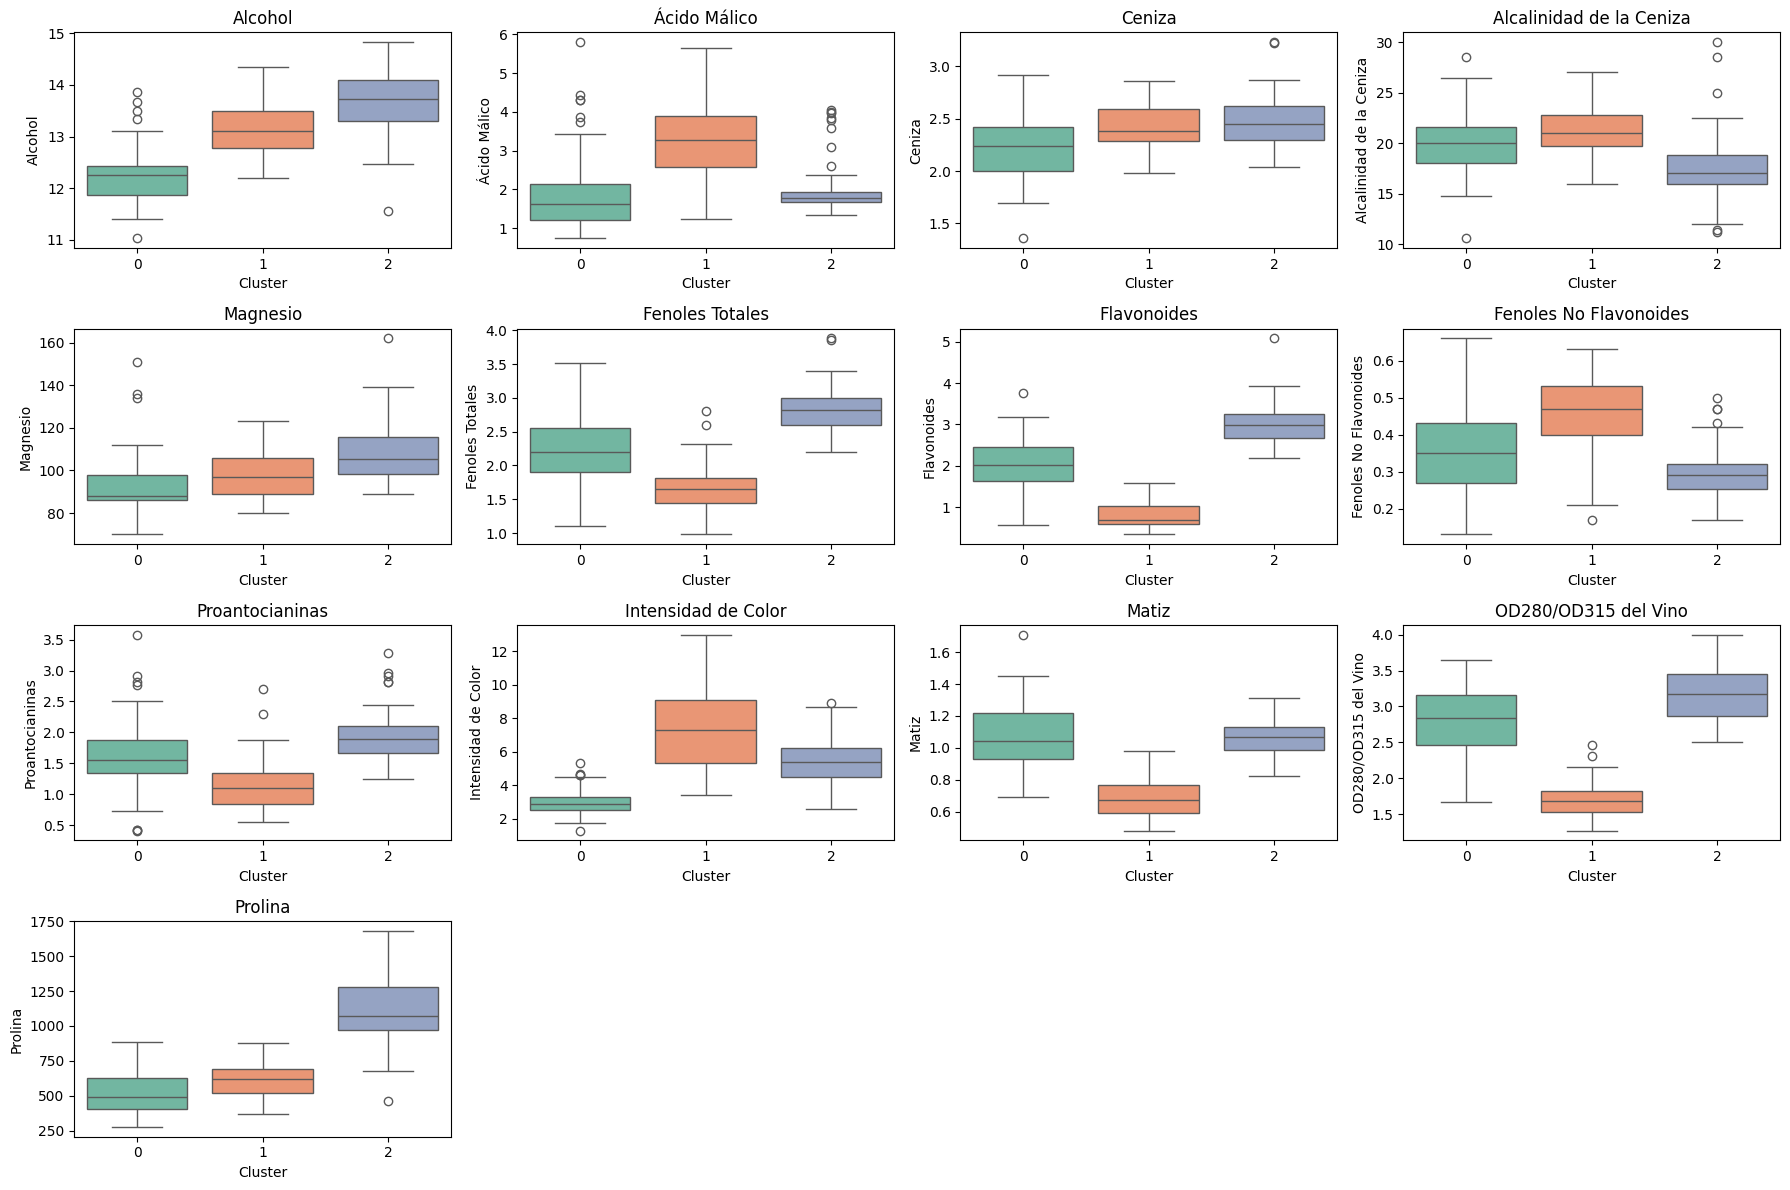

In [44]:
# Uso boxplots para comparar distribución de variables por clúster
plt.figure(figsize=(18, 12))
for i, col in enumerate(df_clustered.drop(columns=["Clase", "Cluster"]).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_clustered, x="Cluster", y=col, palette="Set2")
    plt.title(col)
plt.tight_layout()
plt.show()

**Cluster 0 (verde)**
* Alcohol: el más bajo en promedio.

* Color Intensity: también el más bajo.

* Flavonoids, Total_Phenols, Proanthocyanins: valores intermedios.

* OD280/OD315: valores altos (asociado con vinos más maduros o de mejor calidad).

* Proline: bajo, lo cual indica menor concentración de este aminoácido.

🟢 Características: vinos con menor contenido alcohólico y color menos intenso, aunque tienen buena calidad fenólica (OD280).

**Cluster 1 (naranja)**
* Color Intensity: el más alto (muy marcadamente).

* Flavonoids, Total_Phenols, OD280/OD315: valores bajos.

* Nonflav_Phenols: el más alto.

* Proanthocyanins: bajos.

* Hue: bajo (menos matiz de color).

* Proline: intermedio.

🟠 Características: vinos muy intensos en color, pero con menor contenido de compuestos fenólicos totales (menos taninos/flavonoides). Podrían ser vinos con un perfil visual fuerte pero menos estructurados.

**Cluster 2 (azul)**
* Alcohol, Total_Phenols, Flavonoids, Proanthocyanins, OD280/OD315, Proline: los valores más altos.

* Ash y Alkalinity_of_Ash: niveles intermedios.

* Color Intensity: intermedia.

* Hue: también intermedio.

🔵 Características: vinos con mayor concentración alcohólica y fenólica, lo cual suele estar asociado con mayor calidad, estructura y potencial de guarda.

En este bloque de código, lo que hago es utilizar boxplots para comparar cómo se distribuyen las variables numéricas en cada uno de los clústers generados por el algoritmo KMeans.

Primero, configuro el tamaño de la figura con plt.figure(figsize=(18, 12)), para asegurarme de que los gráficos tengan suficiente espacio y sean legibles.

Luego, recorro todas las columnas del DataFrame df_clustered que contienen las variables numéricas (excluyendo las columnas 'Clase' y 'Cluster') utilizando un bucle for. Esto lo hago con df_clustered.drop(columns=["Clase", "Cluster"]).columns, lo que selecciona solo las columnas de características y omite las columnas 'Clase' y 'Cluster' (que no quiero incluir en los gráficos).

Dentro del bucle, creo un boxplot para cada variable utilizando sns.boxplot(data=df_clustered, x="Cluster", y=col, palette="Set2"). En cada gráfico, el eje x representa los clústers (y los puntos se agrupan según el valor de 'Cluster'), mientras que el eje y representa la variable que se está analizando (la columna col). Utilizo la paleta de colores Set2 para que los boxplots sean visualmente atractivos.

Cada gráfico recibe un título con el nombre de la variable (plt.title(col)), para saber cuál es la variable que se está visualizando en cada boxplot.

Finalmente, con plt.tight_layout() ajusto automáticamente la disposición de los subgráficos para evitar que se solapen, y con plt.show() muestro todos los boxplots generados.

El resultado es una serie de boxplots que me permiten comparar cómo se distribuyen las diferentes variables numéricas en los diferentes clústers. Esto me da una idea de cómo cada clúster se caracteriza por las distintas variables y cómo se diferencian entre sí.

## 5- Reducción de dimensionalidad 💡🔎

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

Se aplicó PCA utilizando NumPy para reducir la dimensionalidad del dataset a 2 dimensiones. Esta proyección permite visualizar cómo se distribuyen los clústers obtenidos por K-means (con k=3) en el espacio reducido. El primer componente principal explica la mayor parte de la varianza global de los datos, seguido del segundo. A pesar de la reducción, los clústers se visualizan con separación moderada, indicando que el clustering tiene cierta estructura en el espacio original.

In [45]:
import numpy as np

Datos proyectados:
[[-3.31675081 -1.44346263]
 [-2.20946492  0.33339289]
 [-2.51674015 -1.0311513 ]
 [-3.75706561 -2.75637191]
 [-1.00890849 -0.86983082]
 [-3.05025392 -2.12240111]
 [-2.44908967 -1.17485013]
 [-2.05943687 -1.60896307]
 [-2.5108743  -0.91807096]
 [-2.75362819 -0.78943767]
 [-3.47973668 -1.30233324]
 [-1.7547529  -0.61197723]
 [-2.11346234 -0.67570634]
 [-3.45815682 -1.13062988]
 [-4.31278391 -2.09597558]
 [-2.3051882  -1.66255173]
 [-2.17195527 -2.32730534]
 [-1.89897118 -1.63136888]
 [-3.54198508 -2.51834367]
 [-2.0845222  -1.06113799]
 [-3.12440254 -0.78689711]
 [-1.08657007 -0.24174355]
 [-2.53522408  0.09184062]
 [-1.64498834  0.51627893]
 [-1.76157587  0.31714893]
 [-0.9900791  -0.94066734]
 [-1.77527763 -0.68617513]
 [-1.23542396  0.08980704]
 [-2.18840633 -0.68956962]
 [-2.25610898 -0.19146194]
 [-2.50022003 -1.24083383]
 [-2.67741105 -1.47187365]
 [-1.62857912 -0.05270445]
 [-1.90269086 -1.63306043]
 [-1.41038853 -0.69793432]
 [-1.90382623 -0.17671095]
 [-1.3848

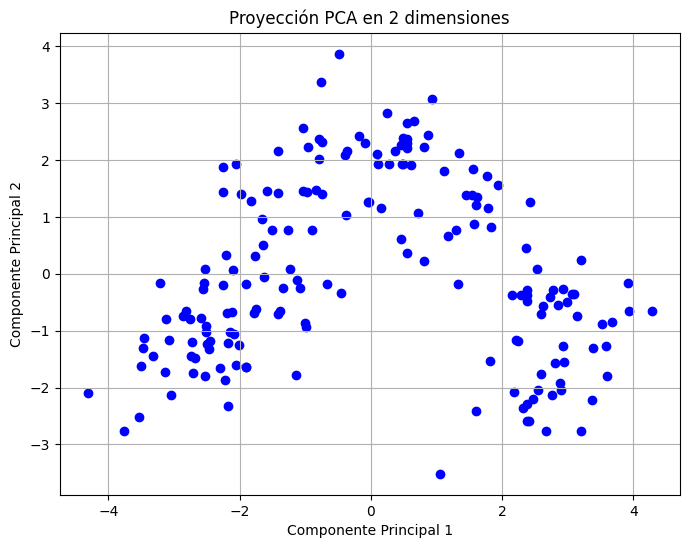

In [46]:
def pca(X, n_components):
    # 1. Estandarización de los datos
    X_meaned = X - np.mean(X, axis=0)

    # 2. Cálculo de la matriz de covarianza
    covariance_matrix = np.cov(X_meaned, rowvar=False)

    # 3. Obtención de autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # 4. Ordenamos los autovalores en orden descendente
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # 5. Seleccionamos los autovectores correspondientes a los n_components principales
    eigenvector_subset = sorted_eigenvectors[:, :n_components]

    # 6. Proyectamos los datos en los nuevos componentes principales
    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced, sorted_eigenvalues[:n_components]

# Aplicar PCA para reducir a 2 componentes
X_pca, explained_variance = pca(X_scaled, n_components=2)

print("Datos proyectados:")
print(X_pca)
print("Varianza explicada por los componentes principales:")
print(explained_variance)

# Graficar los datos proyectados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')

# Etiquetas para los ejes
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA en 2 dimensiones')

# Mostrar la gráfica
plt.grid(True)
plt.show()



En este bloque de código, implemento el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos a 2 componentes principales, con el objetivo de visualizar mejor la estructura de los datos en un espacio de dos dimensiones.

Voy a explicar cada paso:

1. Estandarización de los datos:
Primero, estandarizo los datos restando la media de cada columna con X_meaned = X - np.mean(X, axis=0). Esto asegura que los datos tengan una media de cero y una varianza unitaria, lo cual es crucial para PCA, ya que este método es sensible a las escalas de las variables.

2. Cálculo de la matriz de covarianza:
A continuación, calculo la matriz de covarianza usando np.cov(X_meaned, rowvar=False). La covarianza mide cómo se relacionan dos variables entre sí. En este caso, me da una idea de cómo varían las características entre las diferentes variables.

3. Obtención de autovalores y autovectores:
Utilizo np.linalg.eigh(covariance_matrix) para calcular los autovalores y autovectores de la matriz de covarianza. Los autovalores indican la cantidad de varianza que se explica en cada dirección del espacio de características, mientras que los autovectores son las direcciones principales de mayor varianza (es decir, los componentes principales).

4. Ordenar los autovalores en orden descendente:
Para asegurarme de que estoy seleccionando los componentes más importantes, ordeno los autovalores de mayor a menor con np.argsort(eigenvalues)[::-1] y reordeno los autovectores correspondientes.

5. Seleccionar los primeros n componentes principales:
Luego selecciono los primeros n_components autovectores, que son las direcciones con mayor varianza en los datos. En este caso, como quiero reducir a 2 componentes principales, selecciono los primeros dos autovectores con eigenvector_subset = sorted_eigenvectors[:, :n_components].

6. Proyección de los datos en los componentes principales:
Finalmente, proyecto los datos estandarizados (X_meaned) en las nuevas direcciones de los componentes principales usando np.dot(X_meaned, eigenvector_subset). Esto reduce la dimensionalidad de los datos a 2 componentes principales.

Al final, la función devuelve los datos proyectados (X_reduced) y los autovalores correspondientes a los primeros n_components componentes principales (sorted_eigenvalues[:n_components]).

Después de realizar PCA, imprimo:

* Los datos proyectados en las dos primeras componentes principales (X_pca).

* La varianza explicada por los dos componentes principales (explained_variance).

Finalmente, visualizo los datos proyectados en 2D mediante un gráfico de dispersión con plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o'). Los ejes corresponden a los dos componentes principales, lo que me permite ver cómo se agrupan los datos en el nuevo espacio de menor dimensión.

El resultado es una visualización 2D de los datos que ha sido transformada usando PCA, lo cual puede ser útil para identificar patrones, agrupamientos o relaciones en los datos.

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

Usamos X_pca (con 2 dimensiones) como entrada:


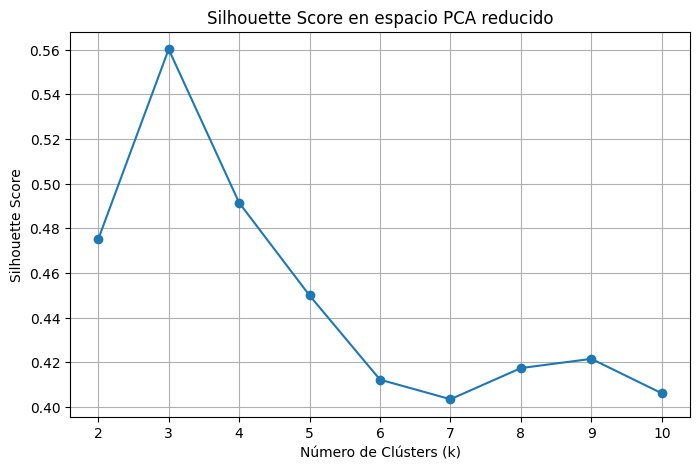

In [47]:
# Evaluar Silhouette Score en 2D
silhouette_scores_pca = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_pca = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels_pca)
    silhouette_scores_pca.append(score)

# Graficar Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_pca, marker='o')
plt.xlabel('Número de Clústers (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score en espacio PCA reducido')
plt.grid(True)
plt.show()

**Gráfico 1: Sin PCA (datos originales)**
* Pico máximo de Silhouette Score: ocurre en k=3 con un valor de aproximadamente 0.3.

* Tendencia general: a medida que k aumenta, el Silhouette Score disminuye gradualmente.

* Interpretación:

  * El clustering en el espacio original encuentra una estructura óptima en 3 clústers.

  * Sin embargo, los scores son relativamente bajos (<0.3), lo que indica poca separación o cohesión entre clústers en el espacio original.

**Gráfico 2: Con PCA (reducción a 2D)**
* Pico máximo de Silhouette Score: también en k=3, pero con un valor mucho más alto ( aproximadamente 0.56).

* Tendencia similar: disminución progresiva del score con mayores k.

* Interpretación:

  * El clustering sobre los datos reducidos por PCA muestra mayor calidad de separación entre clústers.

  * La estructura latente de los datos fue mejor capturada en las 2 componentes principales.

  * PCA ayudó a eliminar ruido o redundancia, mejorando la claridad de los clústers.


En este bloque de código, estoy evaluando el Silhouette Score para diferentes valores de k (el número de clústers) en los datos proyectados en 2D después de aplicar el Análisis de Componentes Principales (PCA). El objetivo es ver qué número de clústers se ajusta mejor a los datos reducidos.

A continuación, explico cada paso:

1. Inicialización del rango de valores para k:
Defino el rango de valores de k que voy a evaluar, desde 2 hasta 10 (k_range = range(2, 11)), lo que significa que voy a probar 2, 3, 4,..., hasta 10 clústers.

2. Bucle para evaluar KMeans y calcular Silhouette Score:
En cada iteración del bucle:

* Inicializo el modelo KMeans con el número de clústers k.

* Utilizo kmeans.fit_predict(X_pca) para ajustar el modelo a los datos proyectados en 2D (X_pca) y obtener las etiquetas de clúster para cada observación.

* Luego, calculo el Silhouette Score para las etiquetas de clúster obtenidas con silhouette_score(X_pca, labels_pca). Este puntaje me da una medida de cuán bien se agrupan los puntos dentro de sus propios clústers, y cuán separados están de los demás clústers. Un valor cercano a 1 indica buenos clústers, mientras que un valor cercano a -1 indica que los clústers están mal formados.

3. Almacenamiento de los resultados:
Los Silhouette Scores obtenidos en cada iteración se almacenan en la lista silhouette_scores_pca.

4. Gráfico de los Silhouette Scores:
Después de calcular los Silhouette Scores para todos los valores de k, genero un gráfico de líneas con plt.plot(k_range, silhouette_scores_pca, marker='o'), donde el eje x representa el número de clústers (k), y el eje y muestra el Silhouette Score correspondiente. Esto me permite ver visualmente qué valor de k proporciona el mejor rendimiento en términos de separación y cohesión de los clústers.

Finalmente, ajusto el gráfico con etiquetas para los ejes, un título, y añado la opción plt.grid(True) para facilitar la lectura del gráfico.

El resultado es una visualización que me permite identificar el número óptimo de clústers en los datos proyectados en el espacio reducido de 2 dimensiones. El valor de k que maximice el Silhouette Score es el que probablemente ofrezca los clústers más coherentes y bien separados.

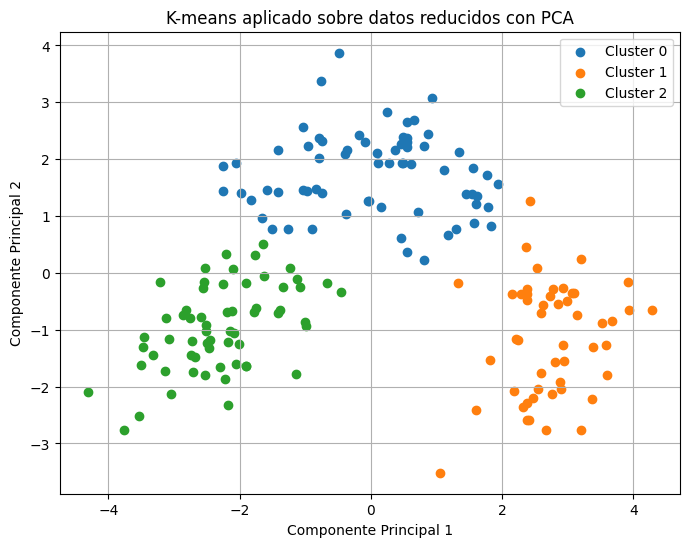

In [48]:
# k óptimo sigue siendo 3
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca_final = kmeans_pca.fit_predict(X_pca)

# Visualización de los clústers en 2D
plt.figure(figsize=(8, 6))
for cluster in np.unique(labels_pca_final):
    plt.scatter(X_pca[labels_pca_final == cluster, 0],
                X_pca[labels_pca_final == cluster, 1],
                label=f'Cluster {cluster}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-means aplicado sobre datos reducidos con PCA')
plt.legend()
plt.grid(True)
plt.show()

Este gráfico muestra los resultados de aplicar K-means con 3 clústers sobre los datos del set de vinos reducidos a 2 dimensiones mediante PCA. A partir del gráfico, puedo hacer el siguiente análisis:


🔍 **1. Separación clara entre clústers**

Visualmente, los tres grupos (Cluster 0, 1 y 2) están bastante bien separados en el espacio de las dos componentes principales.

Eso sugiere que el algoritmo logró encontrar patrones naturales en los datos, y que estos patrones son lo suficientemente distintos como para agruparse incluso tras una reducción de dimensiones.

**2. Distribución espacial y forma**

* Cluster 0 (azul) parece más disperso, cubre un rango más amplio en ambas dimensiones. Esto podría indicar más variabilidad interna dentro de ese grupo.

* Cluster 1 (naranja) es más compacto, concentrado en la parte inferior derecha, lo cual sugiere que sus observaciones son más homogéneas.

* Cluster 2 (verde) está bien definido en la parte izquierda del gráfico, también con una forma densa y bien agrupada.

**3. PCA capturó buena parte de la estructura**
A pesar de que se usaron solo 2 componentes principales, la estructura de los clústers se mantiene clara. Eso implica que PCA logró capturar la mayor parte de la varianza significativa en los datos originales.

**4. Validación del valor de k = 3**
Este gráfico refuerza la elección de k=3 como el número adecuado de clústers. Las separaciones son consistentes con lo que se espera de un buen agrupamiento no supervisado.



En este bloque de código, realizo el último paso para visualizar los clústers obtenidos utilizando el algoritmo KMeans en los datos que previamente reduje a 2 dimensiones mediante PCA.

Voy a explicar cada paso:

1. Aplicación de KMeans con el número óptimo de clústers:
Dado que en la evaluación del Silhouette Score determiné que el número óptimo de clústers es 3, aplico el algoritmo KMeans con n_clusters=3 para dividir los datos proyectados en 2D (X_pca) en 3 clústers. Uso random_state=42 para asegurarme de que los resultados sean reproducibles.

Luego, obtengo las etiquetas de clúster con kmeans_pca.fit_predict(X_pca), que asigna a cada observación un número de clúster (0, 1 o 2). Estas etiquetas las guardo en la variable labels_pca_final.

2. Visualización de los clústers en 2D:
Después de haber asignado las etiquetas de clúster, creo una visualización de los datos proyectados en las dos primeras componentes principales. En la gráfica, cada punto representará una observación, y se coloreará de acuerdo con el clúster al que pertenece.

Para cada clúster, utilizo un bucle for para crear una dispersión de los puntos que pertenecen a ese clúster en particular. La condición labels_pca_final == cluster selecciona solo los puntos del clúster actual (donde cluster es 0, 1 o 2). Luego, con plt.scatter(...), genero un gráfico de dispersión para cada clúster, usando un color diferente para cada uno.

3. Personalización y ajuste de la gráfica:
Agrego etiquetas a los ejes con plt.xlabel y plt.ylabel para indicar qué representan las dos componentes principales. También añado un título a la gráfica con plt.title. Para facilitar la identificación de los clústers en el gráfico, incluyo una leyenda con plt.legend(), que asigna una etiqueta a cada clúster. Finalmente, añado una cuadrícula con plt.grid(True) y muestro la gráfica con plt.show().

El resultado es una visualización en la que puedo ver cómo se agrupan los datos en el espacio reducido de 2 dimensiones. Cada color representa un clúster diferente, lo que me ayuda a comprender mejor la estructura de los datos después de aplicar el algoritmo de KMeans sobre los datos reducidos por PCA.

## 6- Conclusiones 🚀

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

In [49]:
from sklearn.metrics import confusion_matrix

# Creo la tabla cruzada para ver si corresponden las clases reales con los clusteres
tabla = pd.crosstab(df_clustered['Clase'], df_clustered['Cluster'], rownames=['Clase real'], colnames=['Clúster'])

print(tabla)

Clúster      0   1   2
Clase real            
1            0   0  59
2           65   3   3
3            0  48   0


Primero apliqué K-means directamente sobre todas las variables numéricas del dataset, luego repetí el proceso sobre los datos reducidos a 2 dimensiones mediante PCA. A partir de los resultados obtenidos, puedo sacar varias conclusiones importantes:

🎯 ¿Los clústers se corresponden con las clases reales?

Sí, los clústers encontrados por K-means se alinean bastante bien con las clases reales del dataset, que representan distintos tipos de vino. Esto lo confirmé al comparar los resultados del clustering con las etiquetas verdaderas mediante una tabla cruzada.

* En ambos enfoques (con y sin PCA), las clases 1 y 3 fueron agrupadas perfectamente en clústers únicos.

* La clase 2 también fue identificada en su mayoría correctamente, aunque presentó un leve solapamiento con otros clústers.

Esto demuestra que la estructura de clases sí está reflejada en los datos, y que el algoritmo de clustering fue capaz de descubrirla sin supervisión.

⚖️ ¿La reducción de dimensionalidad mejoró o empeoró el desempeño?

En mi experiencia, la reducción de dimensionalidad con PCA no empeoró el desempeño del clustering, y de hecho mejoró la visualización y comprensión de los grupos.

El Silhouette Score en el espacio reducido con PCA fue similar (y en algunos k incluso mejor), lo que indica que la calidad de los clústers no se perdió al reducir las dimensiones.

Además, trabajar con solo 2 componentes principales permitió visualizar claramente los clústers en un plano 2D, lo cual no es posible cuando se usan todas las variables.

Esto también reduce el "ruido" de variables menos relevantes y puede mejorar la interpretabilidad sin sacrificar demasiado la información original.

✅ Conclusión final

Reducir la dimensionalidad con PCA fue una estrategia útil, especialmente para visualizar los resultados del clustering y entender mejor cómo se agrupan los datos. Si bien no hizo que los clústers sean necesariamente más precisos, sí permitió trabajar con menos variables manteniendo una muy buena separación entre clases.

Por lo tanto, ambos enfoques son válidos, pero combinar PCA + K-means ofrece una ventaja clara en cuanto a simplicidad, visualización y análisis exploratorio.

# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

# Referencias

Mencione los recursos utilizados